In [5]:
import pandas as pd
df=pd.read_csv('01_data_mars_opposition.csv')

In [8]:
df.head(12)

,Day,Month,Year,ZodiacIndex,Degree,Minute,Second,LatDegree,LatMinute,ZodiacIndexAverageSun,DegreeMean,MinuteMean,SecondMean
0,18,11,1580,2,6,28,35,1,40,1,25,49,31
1,28,12,1582,3,16,55,30,4,6,3,9,24,55
2,30,1,1585,4,21,36,10,4,32,4,20,8,9
3,6,3,1587,5,25,43,0,3,41,6,0,47,40
4,14,4,1589,7,4,23,0,1,12,7,14,18,26
5,8,6,1591,8,26,43,0,-4,0,9,5,43,55
6,25,8,1593,11,12,16,0,-6,-2,11,9,49,31
7,31,10,1595,1,17,31,40,0,8,1,9,55,4
8,13,12,1597,3,2,28,0,3,33,2,23,11,56
9,18,1,1600,4,8,38,0,4,30,4,4,35,50


In [13]:
import numpy as np
#this method takes in np arrays of degree,minute,seconds and zodiac index and returns np array of radians
def get_as_radian(degree,minute,second,zodiac_index):
    base_angle=zodiac_index*30
    deg_angle=base_angle+degree+(minute/60.0)+(second/3600.0)
    return np.radians(deg_angle)

In [21]:
alpha=get_as_radian(df['Degree'],df['Minute'],df['Second'],df['ZodiacIndex'])
beta=get_as_radian(df['DegreeMean'],df['MinuteMean'],df['SecondMean'],df['ZodiacIndexAverageSun'])

In [61]:
alpha_beta=(alpha,beta)

In [294]:
#radius is the distance from center, alpha= mars_sun angle, beta= mars_avsun angle, x, y are params as in slides
def radius(alpha,beta,x,y):
    #A,B,C are angles of triangle formed by joining vertices sun, av sun and mars
    A=beta-y
    B=np.pi-(alpha-y)
    C=np.pi-A-B
    a=(np.sin(A)/np.sin(C))*(1+x) #used sine rule to get the side opposite to average sun vertex of triangle
    return np.sqrt(1+a**2-2*a*np.cos(B)) #used cosine rule to get dis of mars from center.

def theta(alpha,beta,x,y):
    A=beta-y
    B=np.pi-(alpha-y)
    C=np.pi-A-B
    a=(np.sin(A)/np.sin(C))*(1+x) #used sine rule to get the side opposite to average sun vertex of triangle
    return y+np.arcsin((np.sin(B)*a)/radius(alpha,beta,x,y))

In [136]:
def geometric_mean(values):
    a = np.log(values)
    return np.exp(a.sum()/len(a))

def objective(x_y,alpha,beta):
    r=radius(alpha,beta[1],x_y[0],x_y[1])
    return np.log(np.mean(r))-np.log(geometric_mean(r))


In [230]:
t=np.array([2,2])

In [231]:
np.log(np.mean(t))-np.log(geometric_mean(t))

0.0

In [251]:
from scipy.optimize import minimize,Bounds,shgo
x_y=np.random.rand(2)
print (x_y)
bounds = Bounds([0, 0], [np.inf, 2*np.pi])
# bounds=[(0,100000),(0,2*np.pi)]
res=minimize(objective,x_y,args=alpha_beta,bounds=bounds,method='trust-constr')
print (res)

[0.36223203 0.04175437]
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 290
      cg_stop_cond: 2
            constr: [array([23.80505411,  1.72848491])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 3.2642619609832764
               fun: 0.11354562268065664
              grad: array([-4.01718163e-05,  2.00206736e-04])
               jac: [<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-4.01011374e-05,  1.44771136e-04])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 669
              nhev: 0
               nit: 234
             niter: 234
              njev: 0
        optimality: 0.00014477113567548905
            status: 2
           success: True
         tr_radius: 4.04

In [300]:
r=radius(alpha,beta,res.x[0],res.x[1])
th=theta(alpha,beta,res.x[0],res.x[1])

In [301]:
for R,T in zip(r,th):
    print (R, T)

8.328074682368527 2.375352952195988
1.000000151184207 1.7351239358110422
63.245771410677705 2.460816259790093
27.178696461860323 0.36765890383484723
12.129222460953454 0.6749125620885841
1.9932267893872362 1.6240009081858802
50.532718675824796 2.814477781460294
15.36038693188547 2.6919767421009215
3.2626173030909715 1.8934889256395526
15.707258008202459 2.2139931729888507
49.87510075174179 0.6170892411566407
16.225217815436427 0.385847118538849


In [239]:
for R,T in zip(r,th):
    print (R, T)

7.389444258075495 0.6485425351054197
1.0000000842468388 1.1105849716777246e-08
56.818866218932676 0.7244912127283399
24.36322118224691 -1.3715989732434741
10.9325377703588 -1.0520046446189097
1.8904886150145828 -0.10509076930227612
45.38481126088281 1.0773561734847406
13.721818357991888 0.9629785446173387
2.8256050236966574 0.1641045089709967
14.18335090428539 0.47552844131731536
44.70131173310057 -1.1201033703243934
14.57963892929884 -1.342395775359344


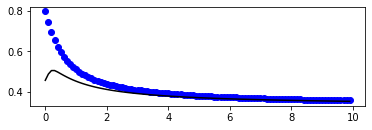

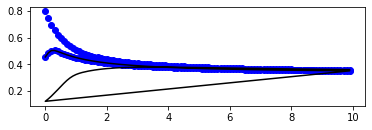

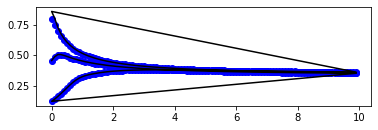

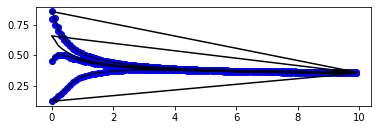

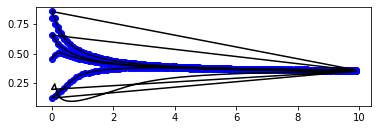

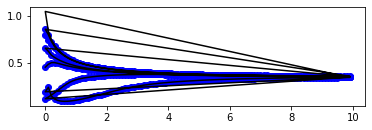

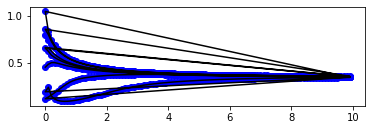

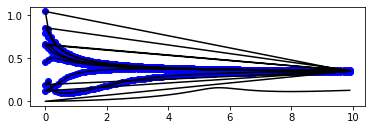

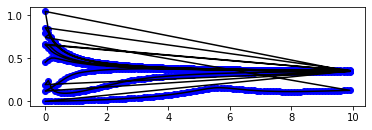

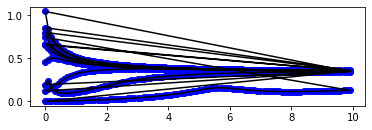

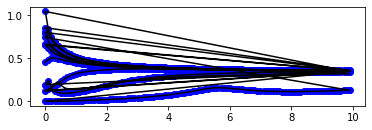

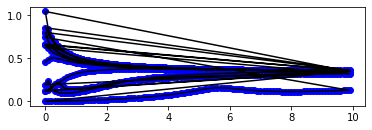

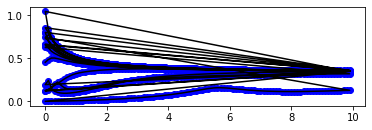

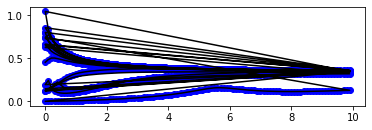

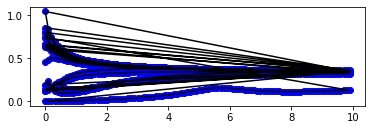

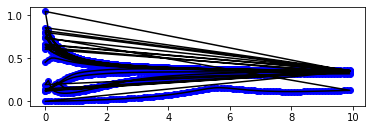

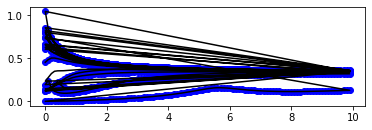

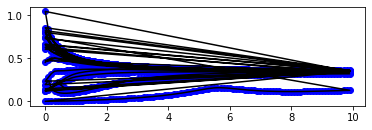

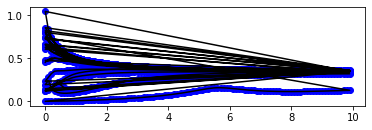

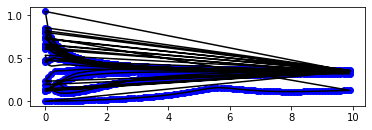

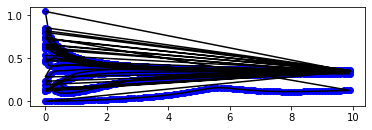

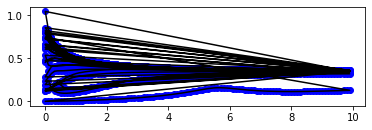

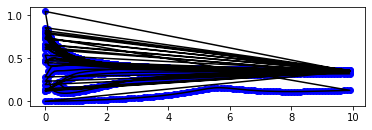

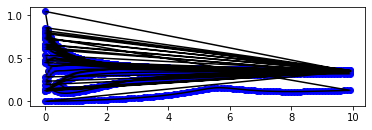

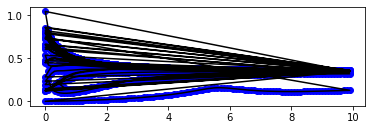

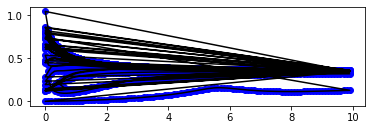

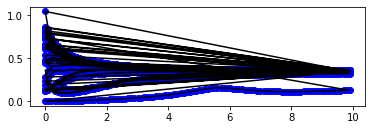

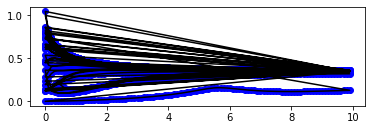

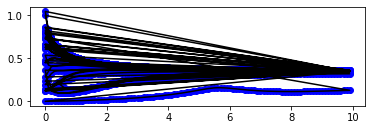

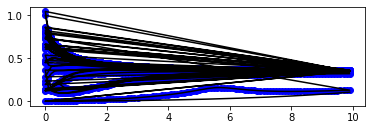

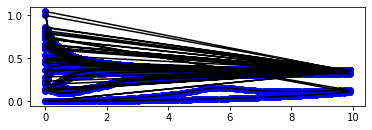

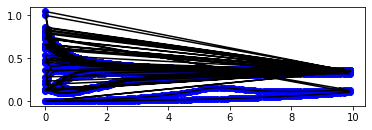

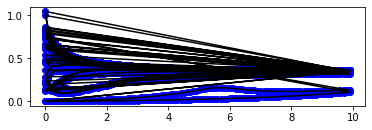

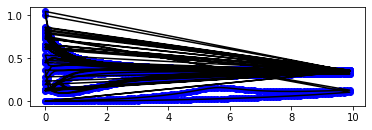

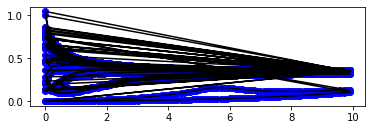

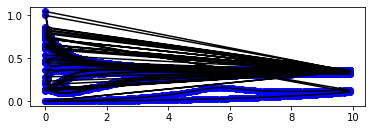

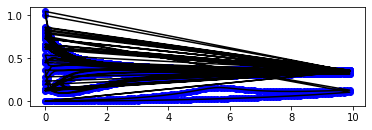

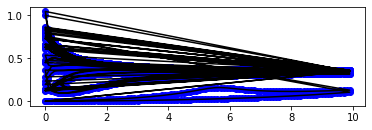

KeyboardInterrupt: 

In [249]:
import matplotlib.pyplot as plt
X=[]
Y=[]
Y_=[]
for y in range(0,1000):
    for x in np.arange(0,10.0,0.1):
        X.append(x)
        Y.append(objective([x,y],alpha,beta))
        Y_.append(objective([x,y+1],alpha,beta))

    plt.figure(1)
    plt.subplot(211)
    plt.plot(X, Y, 'bo', X, Y_, 'k')

    plt.show()


In [253]:
objective(res.x,alpha,beta)

0.11354562268065664

In [298]:
from scipy.optimize import minimize,Bounds,shgo
x_y=np.random.rand(2)
print (x_y)
bounds = Bounds([0, 0], [np.inf, 2*np.pi])
# bounds=[(0,100000),(0,2*np.pi)]
res=minimize(objective,x_y,args=alpha_beta,bounds=bounds,method='trust-constr')
print (res)

[0.40390048 0.43855855]


/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 80
      cg_stop_cond: 4
            constr: [array([1.45266426, 1.73512392])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.6775631904602051
               fun: 2.5535129731814723e-15
              grad: array([-1.02578151e-08,  3.64987960e-07])
               jac: [<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-7.9162678e-09,  2.6385978e-07])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 129
              nhev: 0
               nit: 63
             niter: 63
              njev: 0
        optimality: 2.6385977986702327e-07
            status: 2
           success: True
         tr_radius: 1.1552654628814093e-09
         

In [299]:
objective(res.x,alpha,beta)

2.5535129731814723e-15

In [305]:
def objective2(x_y,alpha,beta):
    r=radius(alpha,beta[1],x_y[0],x_y[1])
    return np.var(r)

from scipy.optimize import minimize,Bounds
x_y=np.random.rand(2)
print (x_y)
bounds = Bounds([0, 0], [np.inf, 2*np.pi])
# bounds=[(0,100000),(0,2*np.pi)]
res2=minimize(objective2,x_y,args=alpha_beta,bounds=bounds,method='trust-constr')
print (res2)




[0.39584417 0.69705394]


/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 56
      cg_stop_cond: 2
            constr: [array([0.2074535 , 1.73512392])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.6847748756408691
               fun: 1.2445377120722083e-16
              grad: array([2.33848605e-16, 3.80355946e-07])
               jac: [<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-4.07334329e-10,  2.74991984e-07])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 162
              nhev: 0
               nit: 61
             niter: 61
              njev: 0
        optimality: 2.749919837532378e-07
            status: 2
           success: True
         tr_radius: 4.809854039288173e-09
           

In [306]:
r=radius(alpha,beta,res2.x[0],res2.x[1])
th=theta(alpha,beta,res2.x[0],res2.x[1])

In [307]:
for R,T in zip(r,th):
    print (R, T)

3.705215821128365 2.4572989090928252
1.0000000238123856 1.7351239245463002
31.517649521090572 2.4501256962049083
13.286935023449653 0.33022707564131304
6.235109055953803 0.7460128900290558
1.4869032804547728 1.661874430498024
25.120968710895013 2.796658544981634
7.281314825039321 2.7490004943694917
1.1077488867354384 1.9658299719884464
8.186659804629263 2.185414180972129
24.335842379638997 0.5983280504816082
8.114397647559132 0.4469236837579149


array([0.5])